In [1]:
cd ..

/projects/SSL-Risk-Decomposition


In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
#!rm -rf /Users/yanndubois/.cache/torch/hub/YannDubs_SSL-Risk-Decomposition_main

# Collect all results

In [4]:
import torch
import pandas as pd
from utils.plotting import *
from utils.collect_results import *
from utils.causal import *
import numpy as np
import warnings
import logging
import hubconf
from pathlib import Path


In [5]:
df, metadata_df = load_df()

df_sup = df.query("ssl_mode == 'supervised'")
df_init = df.query("ssl_mode == 'initialized'")
df = df.query("ssl_mode != 'initialized' & ssl_mode != 'supervised'")
df_IN = df.query("pretraining_data == 'ImageNet-1K'")

Found 178 result files to load.


Missing results for: init_rn50_d8192
Found missing supervised models for:


,pred,seed,arch
0,torch_linear_delta_hypopt,123,missing
1,torch_linear_delta_hypopt,123,missing
2,torch_linear_delta_hypopt,123,missing
3,torch_linear_delta_hypopt,123,missing
4,torch_linear_delta_hypopt,123,vits8 cls
5,torch_linear_delta_hypopt,123,missing
6,torch_linear_delta_hypopt,123,missing
7,torch_linear_delta_hypopt,123,missing
8,torch_linear_delta_hypopt,123,missing
9,torch_linear_delta_hypopt,123,missing


[usability] = [train_train] - [sup_train_train]
[probe_gen] = [train-cmplmnt-ntest_train-sbst-ntest] - [train_train]
[enc_gen] = [train_test] - [train-cmplmnt-ntest_train-sbst-ntest]


Found negative values:


,train-cmplmnt-ntest_train-sbst-ntest,train_train,train-cmplmnt-ntest_test,train_test,union_test,sup_train_train,sup_train_test,agg_risk,approx,usability,probe_gen,enc_gen
enc,,,,,,,,,,,,
dino_vitb16_extracts,19.042,0.811,23.680,23.572,NaN,1.548,16.046,23.572,1.548,-0.737,18.231,4.530
dissl_resnet50_d4096_e100_m2,32.994,0.491,32.988,32.846,NaN,0.845,24.244,32.846,0.845,-0.354,32.503,-0.148
dissl_resnet50_d8192_e100_m2,32.276,0.656,33.756,33.578,NaN,0.845,24.244,33.578,0.845,-0.189,31.620,1.302
dissl_resnet50_d8192_e400_m6,24.528,0.464,28.492,28.344,NaN,0.845,24.244,28.344,0.845,-0.381,24.064,3.816
dissl_resnet50_d8192_e800_m8,23.880,0.463,28.138,28.004,NaN,0.845,24.244,28.004,0.845,-0.382,23.417,4.124
init_vitb32,96.200,92.428,NaN,95.864,NaN,1.132,20.204,95.864,1.132,91.296,3.772,-0.336
init_vitl16,93.020,87.061,NaN,92.952,NaN,0.553,15.880,92.952,0.553,86.508,5.959,-0.068
pirl_rn50w2_headmlp,26.080,0.651,NaN,29.502,NaN,0.743,22.102,29.502,0.743,-0.091,25.429,3.422
simclr_resnet50_d8192_e100_m2,30.432,0.465,33.966,33.920,NaN,0.845,24.244,33.920,0.845,-0.381,29.967,3.488


The following results seem suspicously bad:


,agg_risk
enc,
beit_vitb16_pt22k,57.194


The following models have very different original and evalauted performance:


enc
deepcluster_rn50_bs512_ep200_mmselfsup   -17.566000
dissl_resnet50_dnone_e100_m2               5.037999
jigsaw_rn50                               10.766001
jigsaw_rn50_in22k                         17.584002
msn_vitl16_ep600                           6.359999
rotnet_rn50_in1k                           7.164002
rotnet_rn50_in22k                          7.314002
simclr_rn50_bs256_ep200_mmselfsup          6.275999
speccl_resnet50_bs384_ep100                5.306000
dtype: float64

The following results have some nan:


,approx,usability,probe_gen,enc_gen
enc,,,,
dino_vits16_extractb,NaN,NaN,10.441,4.102
dino_vits16_last,NaN,NaN,4.293,3.812
dino_vits8_last,NaN,NaN,4.449,3.818
ibot_vits16,NaN,NaN,4.515,2.740
init_vits16,NaN,NaN,1.423,0.324
init_vits16_dino_extractb,NaN,NaN,3.921,0.050
mocov3_vits_ep300,NaN,NaN,5.416,3.850
msn_vits16_ep800,NaN,NaN,5.070,3.288
mugs_vits16_ep100,NaN,NaN,5.108,3.066


In [6]:
dummy_aug = pd.get_dummies(df.augmentations.apply(pd.Series).stack()).groupby(level=0).sum()

ANY_GEOMETRIC = ["crop","flip","rotate","autoaugment"]
ANY_PHOTOMETRIC = ["blur","color","gray","photometric","solarize","autoaugment"]
dummy_aug["anygeometric"] =  dummy_aug[ANY_GEOMETRIC].any(axis=1).astype(int)
dummy_aug["anycolor"] =  dummy_aug[ANY_PHOTOMETRIC].any(axis=1).astype(int)

dummy_aug.rename(columns=dict(autoaugment="autoaug"), inplace=True)
dummy_aug.columns = [f"is_aug_{c}" for c in dummy_aug.columns]

df = pd.merge(left=df,
              right=dummy_aug,
              right_index=True,
              left_index=True)

AUGMENTATIONS = list(dummy_aug.columns)

In [7]:
std = load_all_results(pattern=f"**/seed_*/results_all.csv", 
                           skip_ifneq={}, 
                           skip_ifin=dict(ssl=["swav_rn50w5","selav2_rn50_ep400_2x160_4x96"]))
std = std[std.index.isin(['sk_logistic_hypopt','torch_linear_delta_hypopt'], level=1)]
# CORE_METRICS = ["train_test"
#                ] + [c for c in std.columns 
#                    if c.endswith("_test") and (c.startswith('train-balsbst-ntrain') or c.startswith('train-nperclass-')) ]
CORE_METRICS = ["train_test", "train-nperclass-30_test", "train-balsbst-ntrain0.01_test", "train-nperclass-5_test", "train-nperclass-3_test"]
std = std[CORE_METRICS]
assert not (std.groupby("enc").nunique() > 1).any().any()
std = std.groupby("enc").mean()
#std["delta-100%-1%"] = std["train-balsbst-ntrain0.01_test"] - std["train_test"]
METRICS = CORE_METRICS #+ ["delta-100%-1%"]

Found 1197 result files to load.


In [8]:
print("Following results are missing:")
missing=std[std.isna().any(axis=1)]
missing[[("init" not in i) and ("sup" not in i) for i in missing.index]]

Following results are missing:


,train_test,train-nperclass-30_test,train-balsbst-ntrain0.01_test,train-nperclass-5_test,train-nperclass-3_test
enc,,,,,


In [9]:
df = pd.merge(left=df,right=std[CORE_METRICS[1:]],
              right_index=True,left_index=True)

# coarsens many different parameters for cleaner plots
df = preprocess_features(df, round_dict={}, pow_dict={})

melted = melt(df)
#melted_wdelta = melt(df, components=COMPONENTS+["delta-100%-1%"])

In [10]:
#non_core_params = ['date_published','top1acc_in1k_official','projection_nparameters']
core_params = ['objective','version','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other"]#, "pred_dim"
minimal_params = ['objective','version','architecture','patch_size','z_dim','z_layer',"pretraining_data",'finetuning_data']
df_core = df.set_index(core_params)[COMPONENTS]
df_minimal = df.set_index(minimal_params)[COMPONENTS]
melted_onlyComp = melt(df, components=COMPONENTS_ONLY)


CORE_STATISTICS = ['train_rank', "trainaug_vars","trainaug_nc1norm", 
                   'trainaug_alignment', "train_uniformity"]



melted_metrics = pd.melt(melted_onlyComp,
                   value_vars=METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

melted_Onlymetrics = pd.melt(melted_onlyComp,
                   value_vars=CORE_METRICS,
                   id_vars=[c for c in melted_onlyComp.columns if c not in METRICS],
                   var_name="metric",
                    value_name='metric_value',
                    )

In [11]:
df["patch_size"] = df.apply(lambda row: (4 if row["family"] == "convnext" else 7) if pd.isna(row["patch_size"]) else row["patch_size"], axis=1)
df_pre = preprocess_features(df)

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`


In [12]:
# TODO should preprocess the new parameters

In [13]:
print("RMSE to explain")
df[COMPONENTS].var()**0.5

RMSE to explain


approx       0.262656
usability    8.555413
probe_gen    6.395673
enc_gen      1.117013
agg_risk     9.257533
dtype: float64

## Global analysis : all features

### Hyperparameter tuning


In [25]:
%%time
features_to_keep=['objective','architecture','patch_size','z_dim','z_layer',
               "epochs","batch_size", "optimizer", "learning_rate", "weight_decay", "scheduler", "projection_nparameters",
               "pretraining_data",'img_size','year',"nviews",'finetuning_data','projection1_arch','projection2_arch','projection_same', 
               "n_augmentations", "other", "n_negatives", "pred_dim","ssl_mode","is_ema","family","architecture_exact","n_parameters",
                 "is_stopgrad", "is_aug_invariant", "is_official", "is_industry", "n_classes", "projection_hid_width", "projection_hid_depth"
                 ] + AUGMENTATIONS

all_xgbs, all_studys, all_Xs, all_ys, all_rmses =  get_all_xgb(COMPONENTS, 
                                                            df_pre, 
                                                            features_to_keep, 
                                                            prfx="all", 
                                                            is_train=True)


for k,v in all_rmses.items():
    print(f"{k}: best rmse 30-fold CV", v)

``multivariate`` option is an experimental feature. The interface can change in the future.
``group`` option is an experimental feature. The interface can change in the future.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/50 [00:00<?, ?it/s]

Final 30-fold cv rmse=0.05336299124599537


``multivariate`` option is an experimental feature. The interface can change in the future.
``group`` option is an experimental feature. The interface can change in the future.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/50 [00:00<?, ?it/s]

Final 30-fold cv rmse=2.27514411010673


``multivariate`` option is an experimental feature. The interface can change in the future.
``group`` option is an experimental feature. The interface can change in the future.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/50 [00:00<?, ?it/s]

Final 30-fold cv rmse=0.88949757906248


``multivariate`` option is an experimental feature. The interface can change in the future.
``group`` option is an experimental feature. The interface can change in the future.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/50 [00:00<?, ?it/s]

Final 30-fold cv rmse=3.6044360163541826
approx: best rmse 30-fold CV 0.05336299124599537
usability: best rmse 30-fold CV 4.27730063057656
probe_gen: best rmse 30-fold CV 2.27514411010673
enc_gen: best rmse 30-fold CV 0.88949757906248
agg_risk: best rmse 30-fold CV 3.6044360163541826
CPU times: user 5h 50min 33s, sys: 3min 39s, total: 5h 54min 13s
Wall time: 44min 56s


In [ ]:
#plot_optuna(all_studys["agg_risk"])

RMSE: 2.4064. R2: 0.9320


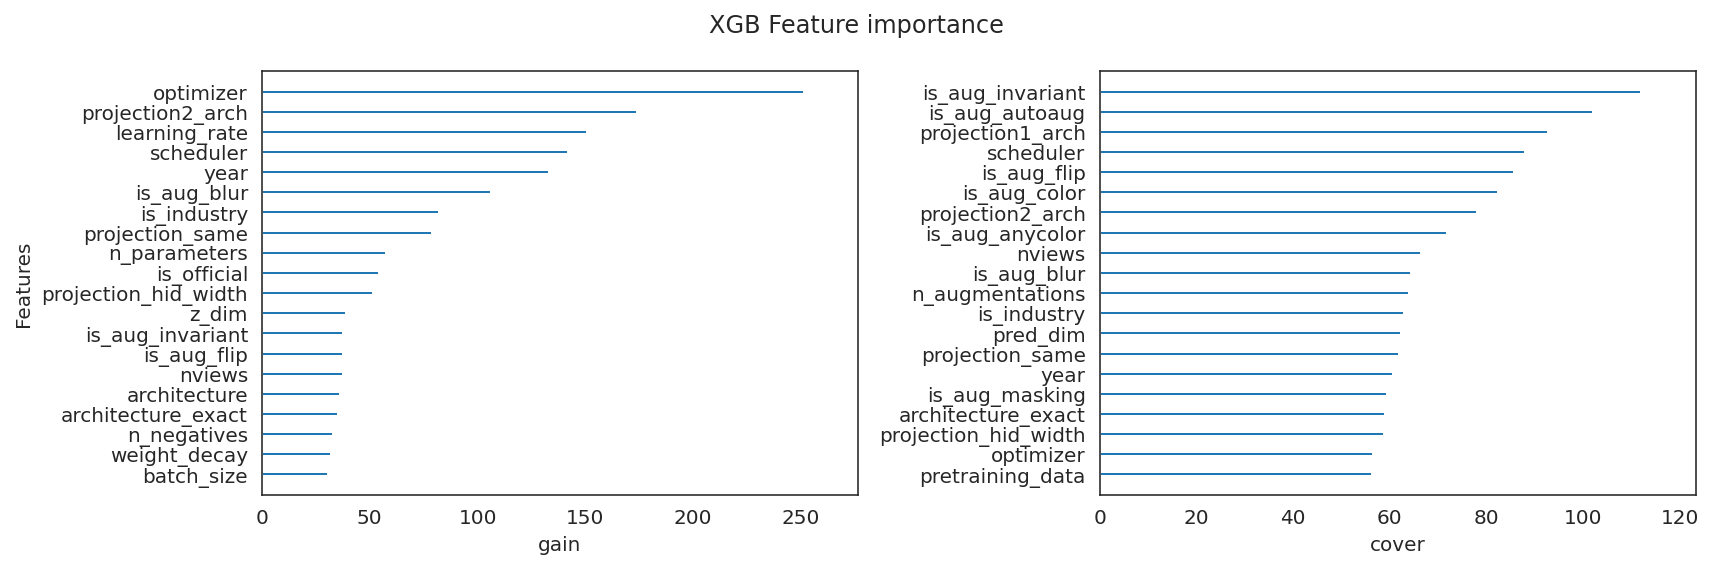

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


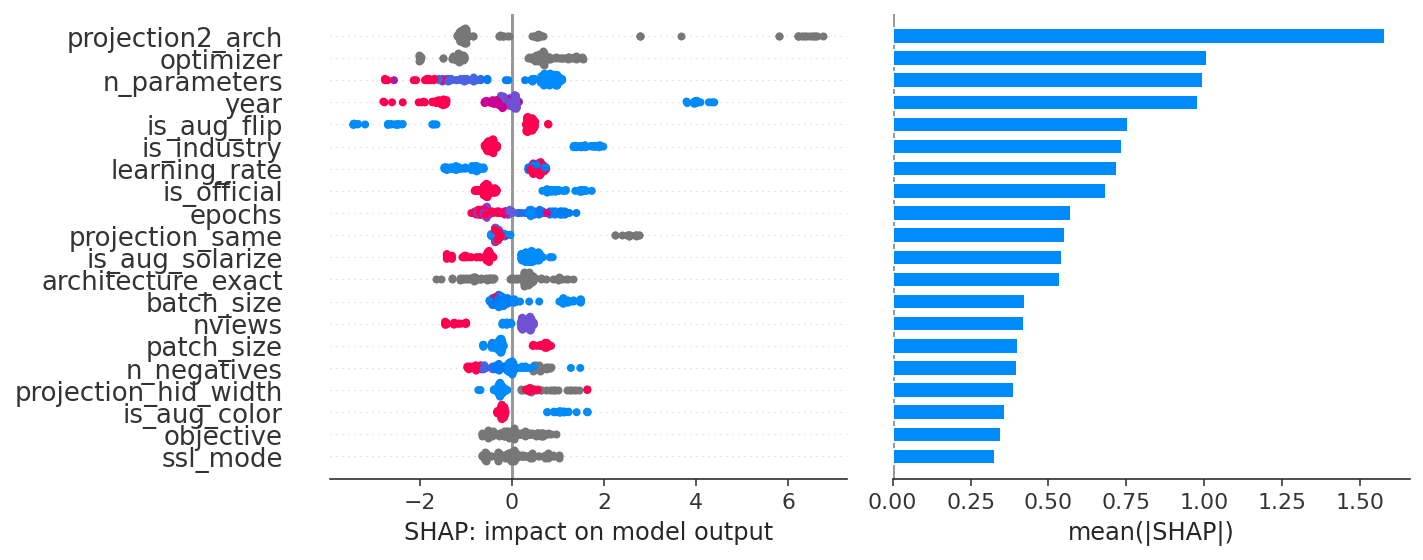

clip_vitl14


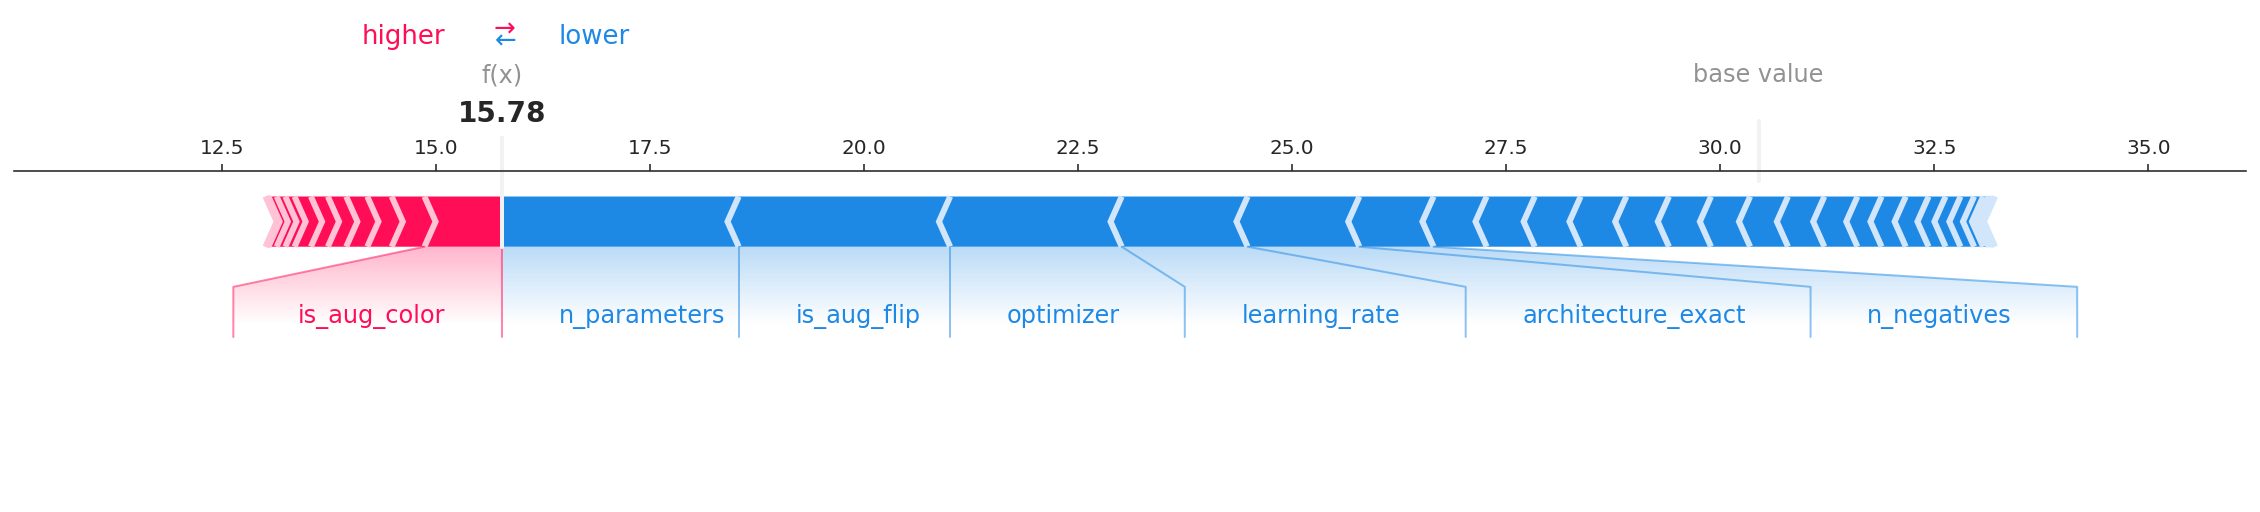

swav_rn50w4


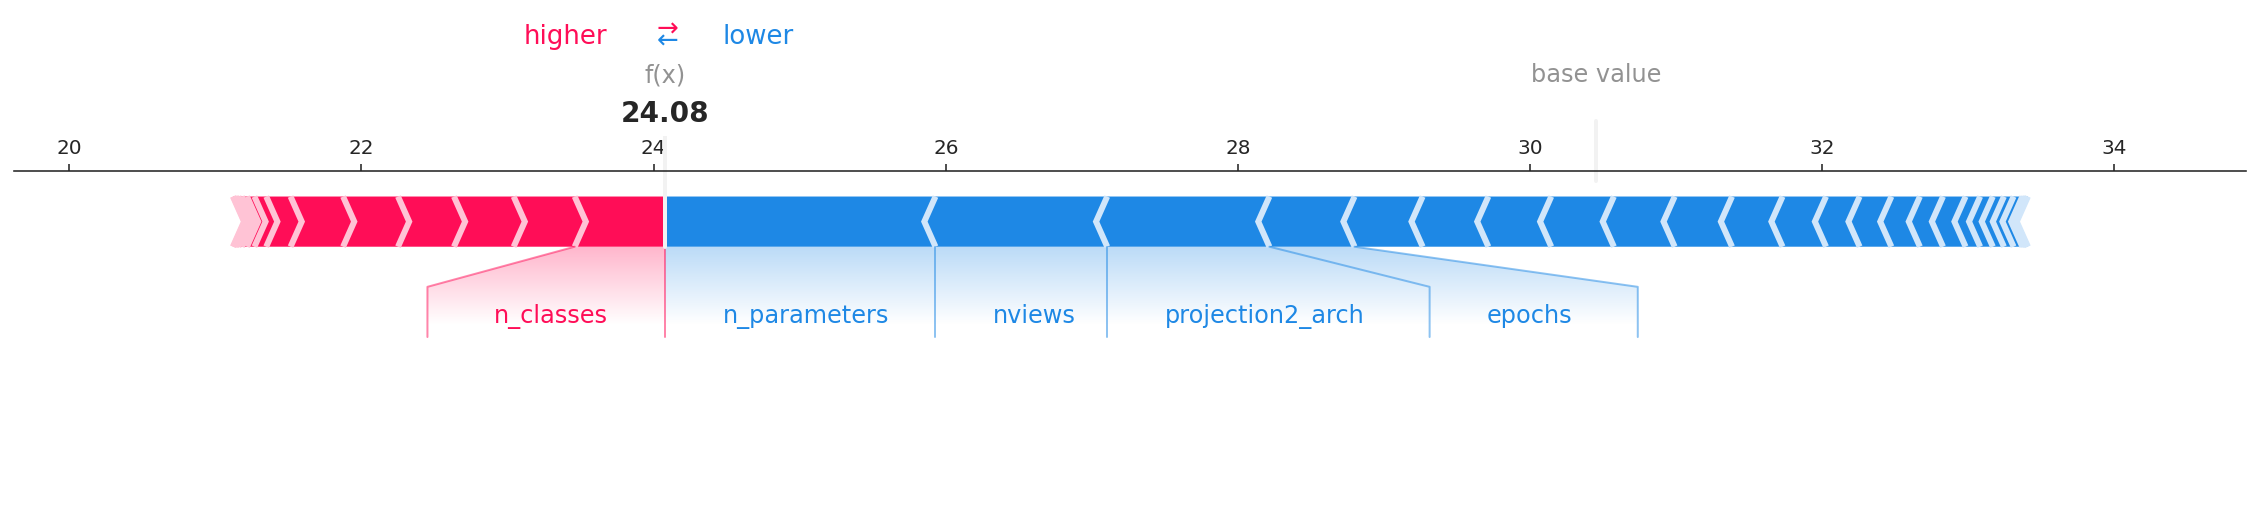

lossyless_vitb32_b01


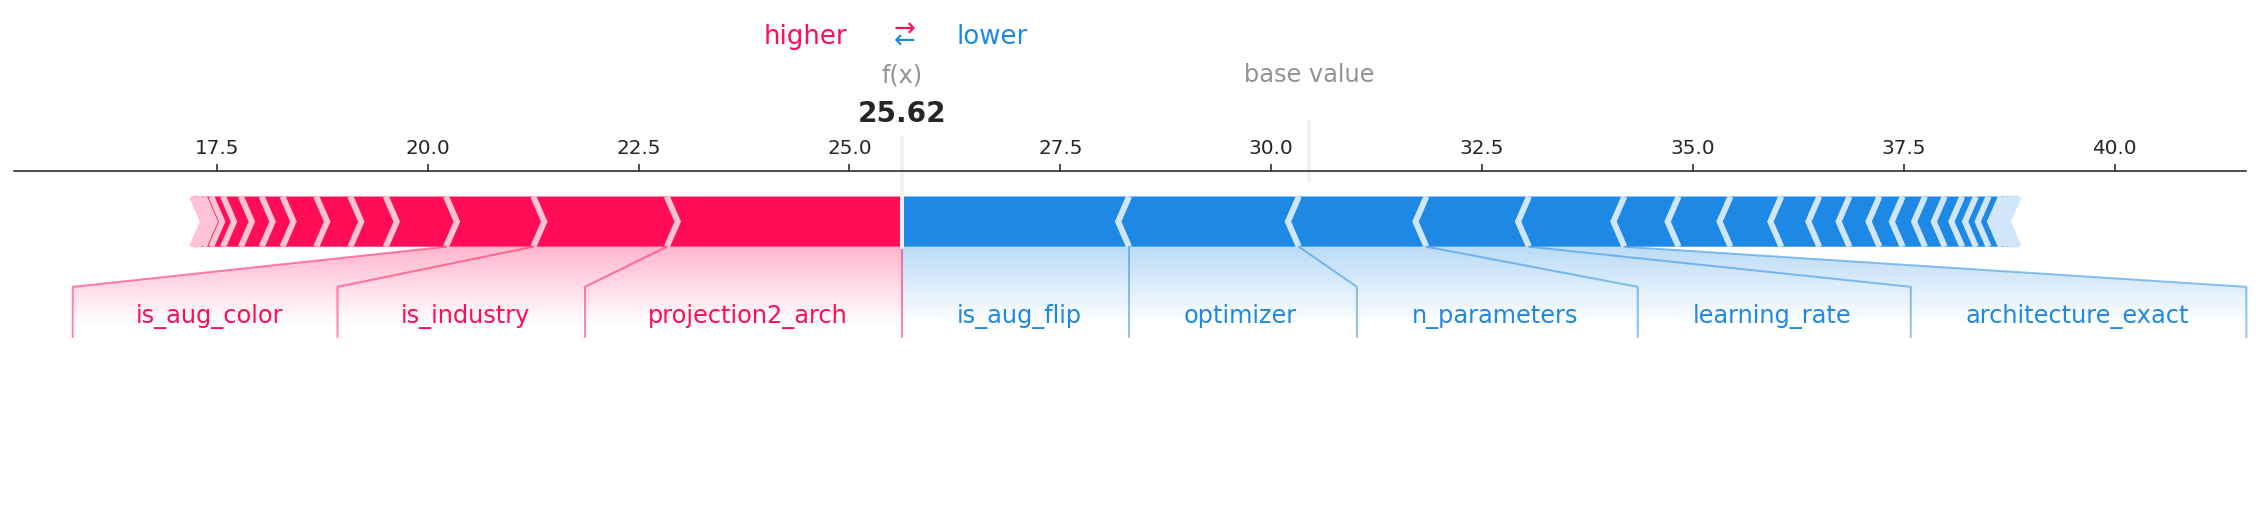

dissl_resnet50_d4096_e100_m2


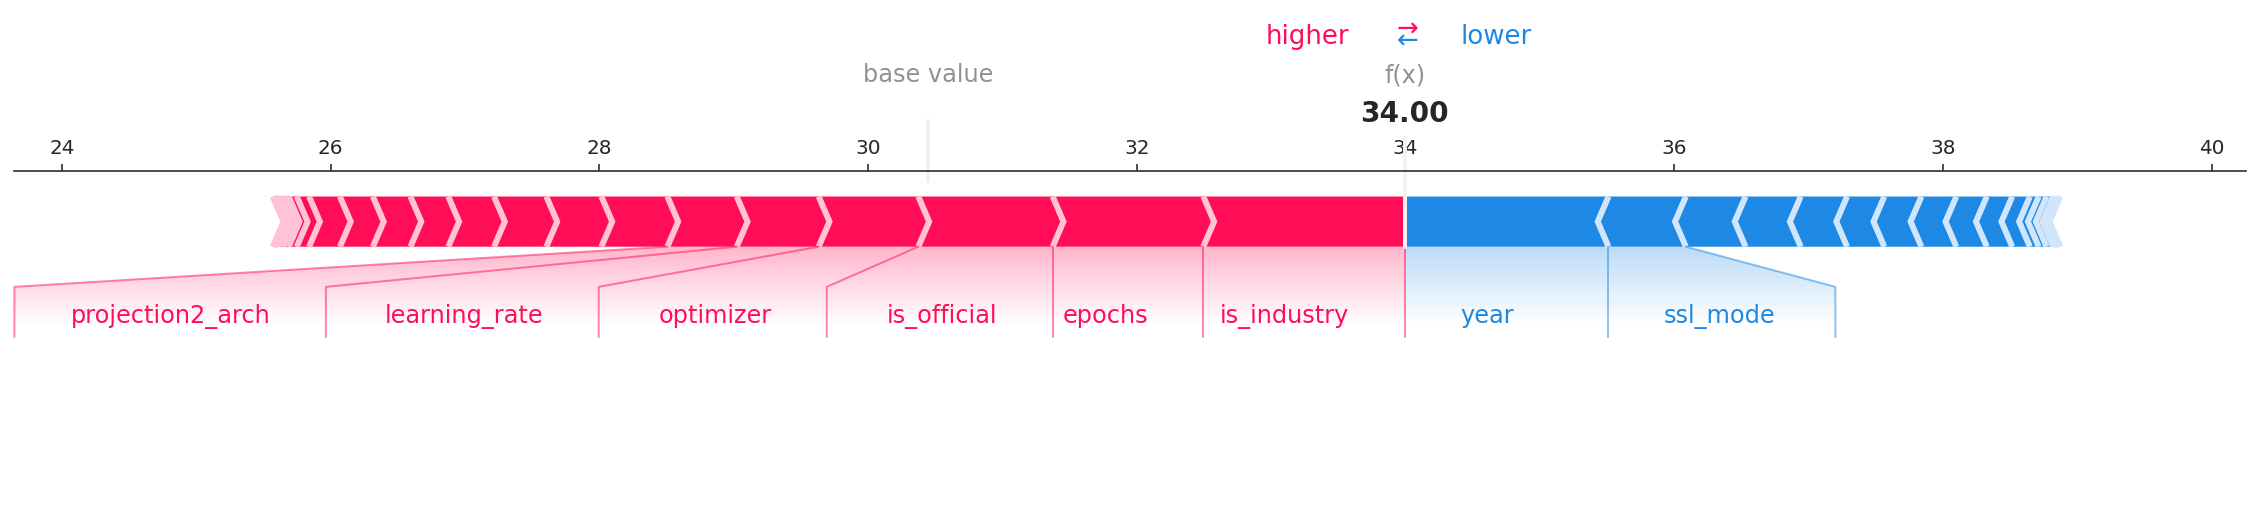

simclr_rn50


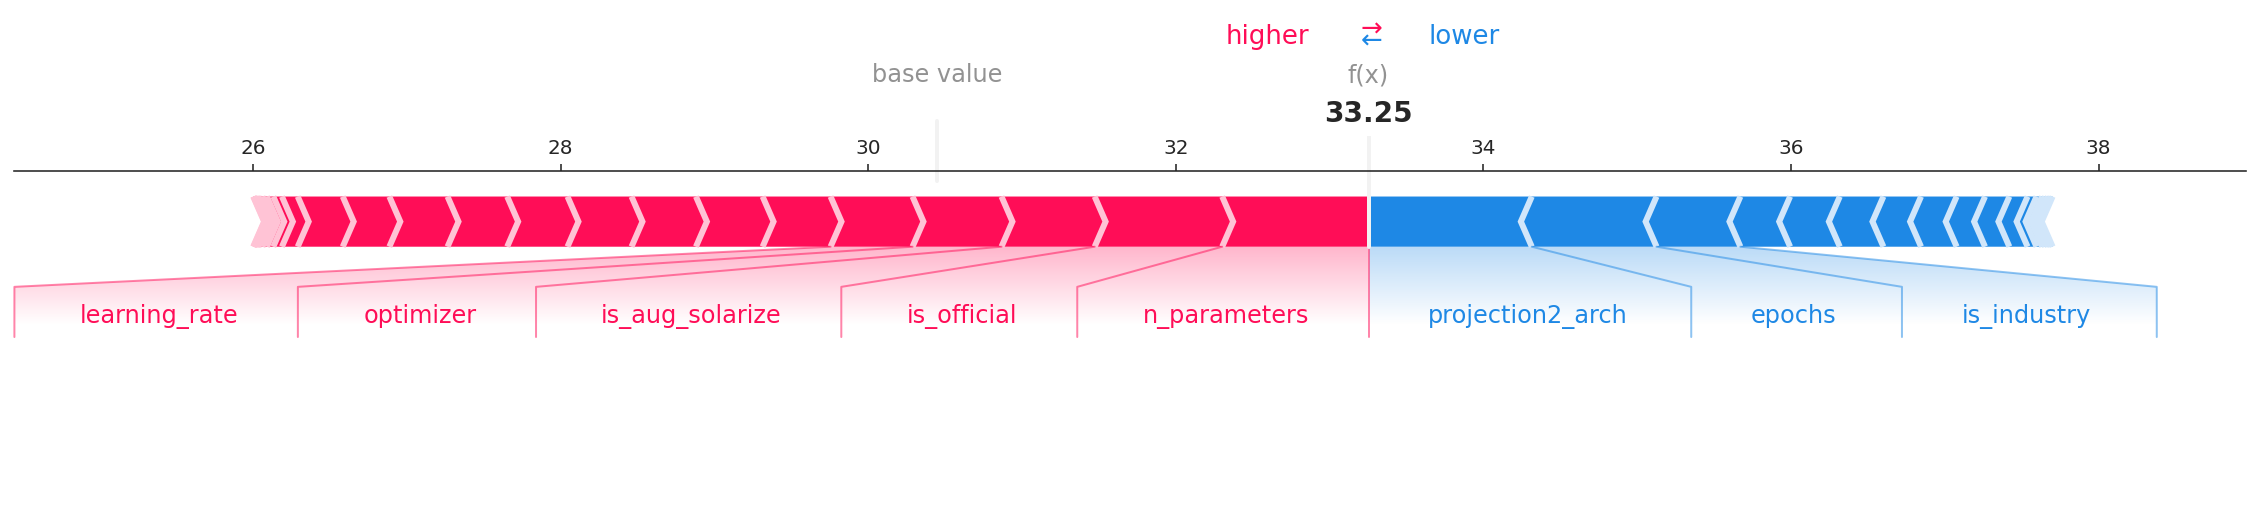

In [ ]:
o = "agg_risk"
report_xgboost(all_xgbs[o], all_Xs[o], all_ys[o], n_feat=20, 
              examples= ["clip_vitl14","swav_rn50w4","lossyless_vitb32_b01","dissl_resnet50_d4096_e100_m2","simclr_rn50"])

Now let's look at all the features we can likely remove for the next experiment. Ie those that do not seem very important

In [ ]:
for k in ["weight", "gain", "cover", "total_gain", "total_cover"]:
    print(k)
    display(pd.Series(all_xgbs[o].get_score(importance_type=k)).sort_values().head(5))
    print()

weight


is_aug_autoaug      1.0
is_aug_invariant    1.0
pretraining_data    3.0
scheduler           4.0
is_aug_anycolor     5.0
dtype: float64


gain


is_ema             4.149258
family             5.230417
is_aug_autoaug     7.143342
z_layer            9.460854
is_aug_gray       13.197618
dtype: float64


cover


is_stopgrad    32.534885
is_ema         39.190475
family         40.000000
ssl_mode       40.586666
patch_size     44.625000
dtype: float64


total_gain


is_aug_autoaug       7.143342
is_aug_invariant    37.711624
family              52.304169
pretraining_data    52.392235
is_aug_anycolor     81.035187
dtype: float64


total_cover


is_aug_autoaug      102.0
is_aug_invariant    112.0
pretraining_data    169.0
scheduler           352.0
is_aug_anycolor     359.0
dtype: float64


## Global analysis : selected features

In [ ]:
### %%time
features_to_keep= ["objective","architecture",'patch_size',"epochs",'batch_size','pretraining_data',"n_augmentations",
                   "n_negatives","pred_dim", "n_classes",'projection2_arch',"projection_same","z_layer",
                   'finetuning_data', "nviews", 'z_dim', "scheduler", "is_official", "optimizer", "family", "ssl_mode",
                   "n_parameters", "is_aug_invariant","projection_nparameters",'projection1_arch'] 

sel_xgbs, sel_studys, sel_Xs, sel_ys, sel_rmses =  get_all_xgb(COMPONENTS, df_pre, features_to_keep, 
                                                               prfx="sel",is_train=True)

for k,v in sel_rmses.items():
    print(f"{k}: best rmse 30-fold CV", v)

``multivariate`` option is an experimental feature. The interface can change in the future.
``group`` option is an experimental feature. The interface can change in the future.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/50 [00:00<?, ?it/s]

Final 30-fold cv rmse=0.07349801798210086


``multivariate`` option is an experimental feature. The interface can change in the future.
``group`` option is an experimental feature. The interface can change in the future.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/50 [00:00<?, ?it/s]

Final 30-fold cv rmse=4.590305005523806


``multivariate`` option is an experimental feature. The interface can change in the future.
``group`` option is an experimental feature. The interface can change in the future.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/50 [00:00<?, ?it/s]

Final 30-fold cv rmse=2.452455749043928


``multivariate`` option is an experimental feature. The interface can change in the future.
``group`` option is an experimental feature. The interface can change in the future.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/50 [00:00<?, ?it/s]

Final 30-fold cv rmse=0.8495839506397433


``multivariate`` option is an experimental feature. The interface can change in the future.
``group`` option is an experimental feature. The interface can change in the future.
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
o = "agg_risk"
report_xgboost(sel_xgbs[o], sel_Xs[o], sel_ys[o], n_feat=20, 
              examples= ["clip_vitl14","swav_rn50w4","lossyless_vitb32_b01","dissl_resnet50_d4096_e100_m2","simclr_rn50"])

In [ ]:
for k in ["weight", "gain", "cover", "total_gain", "total_cover"]:
    print(k)
    display(pd.Series(sel_xgbs[o].get_score(importance_type=k)).sort_values().head(10))
    print()


## Global analysis : minimal features

In [ ]:
%%time
features_to_keep= ["objective","architecture",'patch_size',"epochs",'pretraining_data','projection2_arch', 
                 'finetuning_data', "nviews", 'z_dim', "family", "ssl_mode",'projection1_arch',
                   "n_parameters", "is_aug_invariant","n_augmentations"] 

min_xgbs, min_studys, min_Xs, min_ys, min_rmses =  get_all_xgb(COMPONENTS, df_pre, features_to_keep, 
                                                              prfx="min",is_train=True)

for k,v in min_rmses.items():
    print(f"{k}: best rmse 30-fold CV", v)

In [ ]:
o = "agg_risk"
report_xgboost(min_xgbs[o], min_Xs[o], min_ys[o], n_feat=20, 
              examples= ["clip_vitl14","swav_rn50w4","lossyless_vitb32_b01","dissl_resnet50_d4096_e100_m2","simclr_rn50"])

In [ ]:
for k in ["weight", "gain", "cover", "total_gain", "total_cover"]:
    print(k)
    display(pd.Series(min_xgbs[o].get_score(importance_type=k)).sort_values().head(5))
    print()


## Global analysis : minimal features

In [ ]:
%%time
features_to_keep= ['patch_size',"epochs",'pretraining_data','projection2_arch', 
                 'finetuning_data', "nviews", 'z_dim', "family", "ssl_mode",'projection1_arch',
                   "n_parameters", "n_augmentations"] 

nano_xgbs, nano_studys, nano_Xs, nano_ys, nano_rmses =  get_all_xgb(COMPONENTS, df_pre, features_to_keep, 
                                                                   prfx="nano",is_train=True)

for k,v in nano_rmses.items():
    print(f"{k}: best rmse 30-fold CV", v)